In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the CSV Files
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Display the first few rows
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
# Check data structure
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [5]:
#Check for Missing Values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
#Check for Duplicates
print("Duplicate transactions:", transactions.duplicated().sum())
print("Duplicate customers:", customers.duplicated().sum())
print("Duplicate products:", products.duplicated().sum())

Duplicate transactions: 0
Duplicate customers: 0
Duplicate products: 0


In [7]:
#Verify Data Types
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [8]:
# Remove potential whitespace issues
transactions = transactions.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
customers = customers.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
products = products.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
# Ensure consistency of data checking matching IDs across datasets
print(set(transactions['CustomerID']).issubset(set(customers['CustomerID'])))
print(set(transactions['ProductID']).issubset(set(products['ProductID'])))

True
True


# Descriptive Statistics

In [10]:
print(transactions.describe())
print(customers.describe(include='object'))
print(products.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
       CustomerID      CustomerName         Region
count         200               200            200
unique        200               200              4
top         C0001  Lawrence Carroll  South America
freq            1                 1             59
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [11]:
#Unique value counts
print("Unique Customers:", transactions['CustomerID'].nunique())
print("Unique Products:", transactions['ProductID'].nunique())
print("Unique Transaction Dates:", transactions['TransactionDate'].nunique())

Unique Customers: 199
Unique Products: 100
Unique Transaction Dates: 1000


In [12]:
# Merge transactions with customers and products to enable deeper analysis
df_merged = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
print(df_merged.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

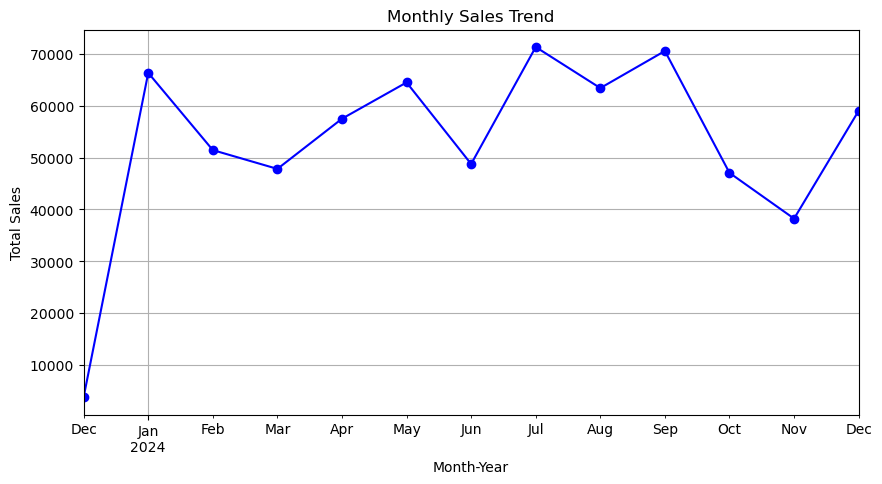

In [13]:
#Analyze Sales Trends Over Time
df_merged['MonthYear'] = df_merged['TransactionDate'].dt.to_period('M')
monthly_sales = df_merged.groupby('MonthYear')['TotalValue'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

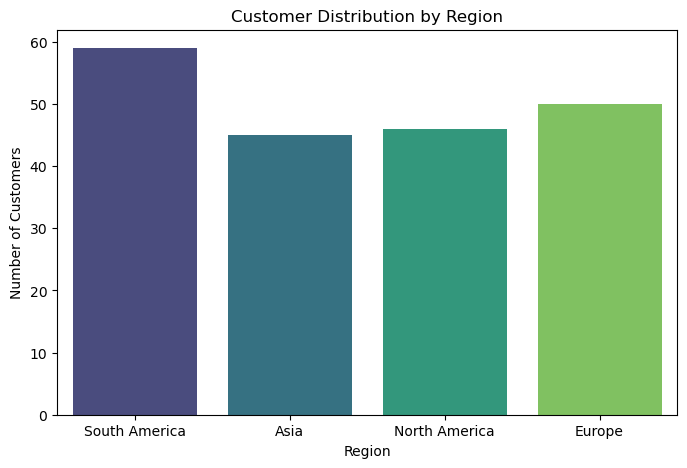

In [14]:
#Customer Distribution by Region
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

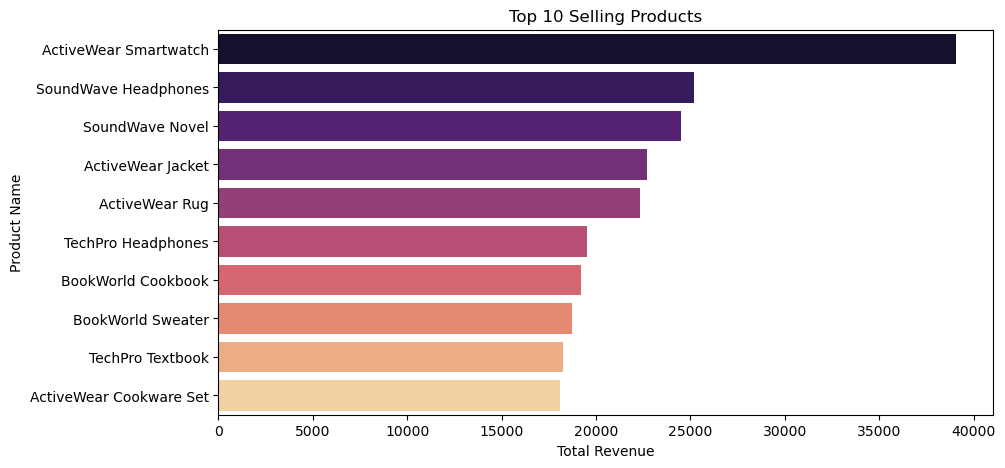

In [15]:
#Top-Selling Products
top_products = df_merged.groupby('ProductName')['TotalValue'].sum().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

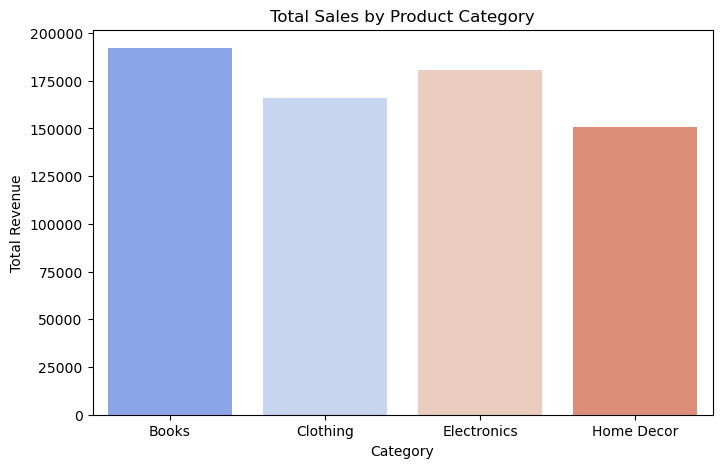

In [16]:
#Product Category Analysis
category_sales = df_merged.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

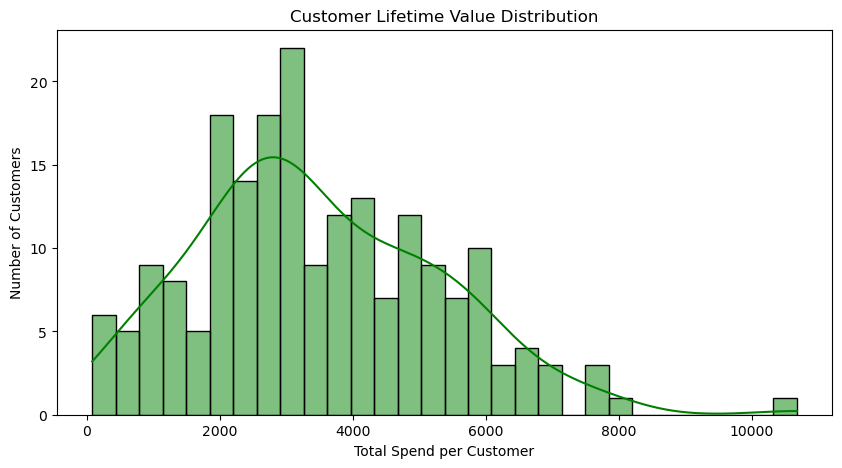

In [17]:
#Customer Lifetime Value (CLV) Analysis
customer_lifetime_value = df_merged.groupby('CustomerID')['TotalValue'].sum()

plt.figure(figsize=(10, 5))
sns.histplot(customer_lifetime_value, bins=30, kde=True, color='green')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Spend per Customer')
plt.ylabel('Number of Customers')
plt.show()

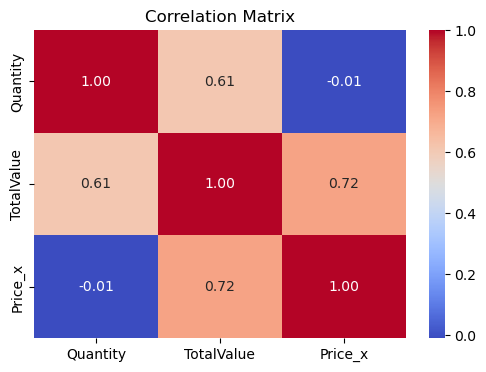

In [18]:
#Correlation Analysis
correlation_matrix = df_merged[['Quantity', 'TotalValue', 'Price_x']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

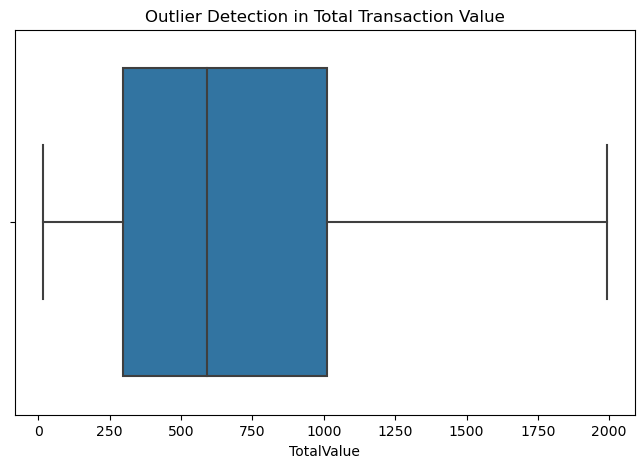

In [19]:
#Outlier Detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_merged['TotalValue'])
plt.title('Outlier Detection in Total Transaction Value')
plt.show()